In [131]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [132]:
# Defining Class for preparing Data to apply ML Models
class Pre_processing():
    # Defining Data Importing Function
    def data_loading(self, path):
        df = pd.read_csv(path)

        return df

    # Defining function to convert boolean data into numeric data
    def boolean_col_preprocessing(self, df):
        bool_list = df.select_dtypes(include='bool').columns
        for col in bool_list:
            df[col] = df[col].map({True:1, False:0})
        
        return df

    # One-Hot Encoding function to convert object data into numeric data
    def object_col_preprocessing(self, df):
        object_list = df.select_dtypes(include='object').columns

        for col in object_list:
            dummy_df = pd.get_dummies(df[col])
            df = pd.concat([df, dummy_df], axis='columns')
        
        df = df.drop(object_list, axis='columns')
        
        return df
    

In [133]:
Pp = Pre_processing()
data = Pp.data_loading('/home/meghal/Personal/Personal Projects/Space Titanic/Data/cleaned_training_data.csv')
data['Cabin'] = data.Cabin.apply(lambda x: x.split('/')[2])
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,Europa,False,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8677,Earth,True,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8678,Earth,False,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8679,Europa,False,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


<AxesSubplot:>

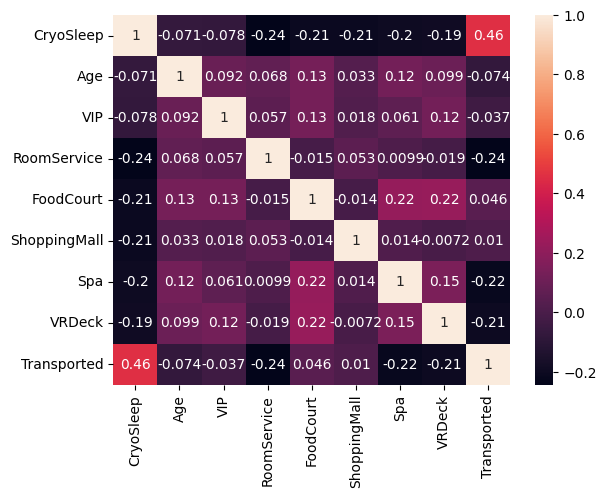

In [134]:
sns.heatmap(data.corr(), annot=True)

In [135]:
data.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [136]:
data = Pp.boolean_col_preprocessing(data)
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,Europa,0,P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8677,Earth,1,S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8678,Earth,0,S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8679,Europa,0,S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [137]:
dt = Pp.object_col_preprocessing(data)
dt

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,1,0,0
8677,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0
8678,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,1,0,0,1
8679,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,0,1,1,0,0
